# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [185]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [186]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()
hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [187]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

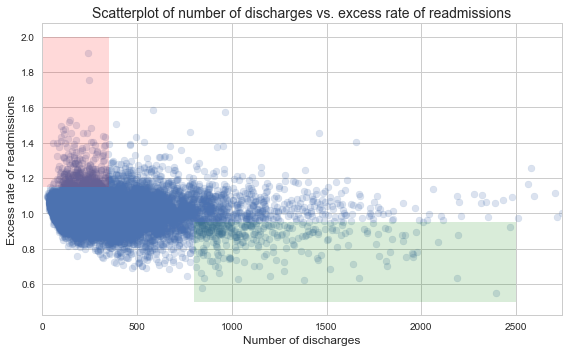

In [188]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

### The scatter plot is spurious because 1. each hospital is plotted 5 times for  5 different measures and these measures should be separated (hip and knee replacements should have a diiferent readdimission rate compared to heart surguries) 2. the scatter does not look like it fits a linear model but is interpreted linearly. 3. There is no hypothesis testing 


# Exploratory data analysis

In [189]:
print(hospital_read_df["Measure Name"].value_counts(dropna=False))

#each hospital associated with 5 measures 

READM-30-PN-HRRP          3372
READM-30-AMI-HRRP         3372
READM-30-HF-HRRP          3372
READM-30-HIP-KNEE-HRRP    3372
READM-30-COPD-HRRP        3372
Name: Measure Name, dtype: int64


In [190]:
# sqrt transforming the Number of Discharges because of the large spread -- easier to interpret the trandformed x=axis
clean_hospital_read_df['sqrt_discharge']= np.sqrt(clean_hospital_read_df['Number of Discharges'])
#separating the data for each procdure type 
hipknee_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP']
pneumonia_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'] == 'READM-30-PN-HRRP']
heartfail_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'] == 'READM-30-HF-HRRP']
myocardial_infarction_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'] == 'READM-30-AMI-HRRP']
pulmonary_disease_df = clean_hospital_read_df[clean_hospital_read_df['Measure Name'] == 'READM-30-COPD-HRRP']


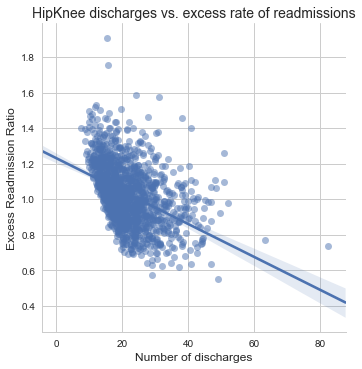

In [191]:

sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.lmplot('sqrt_discharge', 'Excess Readmission Ratio', \
           data=hipknee_df, fit_reg=True, \
           logx =False, scatter_kws={'alpha':0.5}) # S marker size

# Set title
plt.title('HipKnee discharges vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Number of discharges', fontsize=12)

# Set y-axis label
plt.ylabel('Excess Readmission Ratio', fontsize=12)
plt.show()


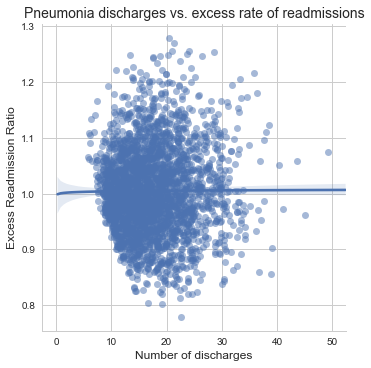

In [192]:

sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.lmplot('sqrt_discharge', 'Excess Readmission Ratio', \
           data=pneumonia_df, fit_reg=True, \
           logx =True, scatter_kws={'alpha':0.5}) # S marker size

# Set title
plt.title('Pneumonia discharges vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Number of discharges', fontsize=12)

# Set y-axis label
plt.ylabel('Excess Readmission Ratio', fontsize=12)
plt.show()


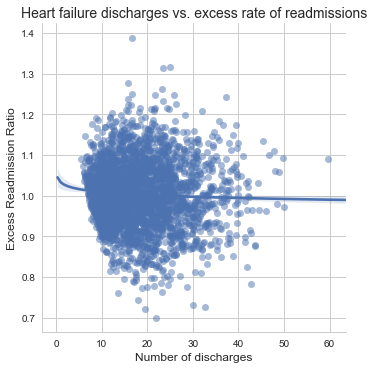

In [193]:

sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.lmplot('sqrt_discharge', 'Excess Readmission Ratio', \
           data=heartfail_df, fit_reg=True, \
           logx =True, scatter_kws={'alpha':0.5}) # S marker size

# Set title
plt.title('Heart failure discharges vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Number of discharges', fontsize=12)

# Set y-axis label
plt.ylabel('Excess Readmission Ratio', fontsize=12)
plt.show()


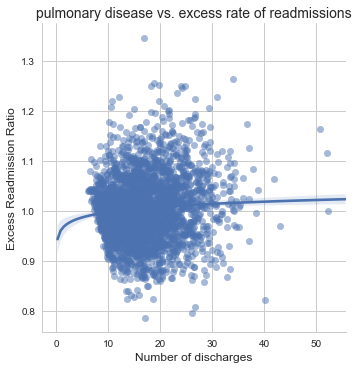

In [194]:

sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.lmplot('sqrt_discharge', 'Excess Readmission Ratio', \
           data=pulmonary_disease_df, fit_reg=True, \
           logx =True, scatter_kws={'alpha':0.5}) # S marker size

# Set title
plt.title('pulmonary disease vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Number of discharges', fontsize=12)

# Set y-axis label
plt.ylabel('Excess Readmission Ratio', fontsize=12)
plt.show()


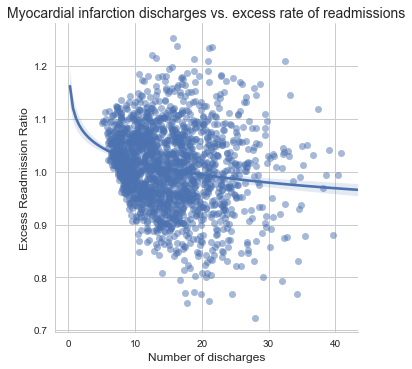

In [195]:

sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.lmplot('sqrt_discharge', 'Excess Readmission Ratio', \
           data=myocardial_infarction_df, fit_reg=True, \
           logx =True, scatter_kws={'alpha':0.5}) # S marker size

# Set title
plt.title('Myocardial infarction discharges vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Number of discharges', fontsize=12)

# Set y-axis label
plt.ylabel('Excess Readmission Ratio', fontsize=12)
plt.show()


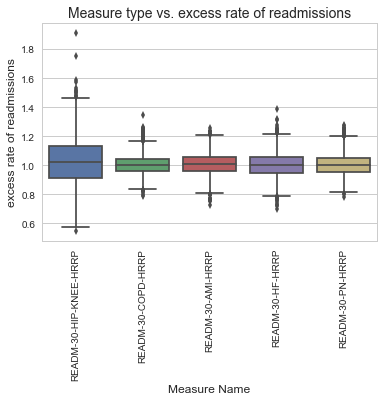

In [201]:
sns.set_style("whitegrid")
# Create scatterplot of dataframe
sns.boxplot(x="Measure Name", y='Excess Readmission Ratio', \
           data=clean_hospital_read_df) # S marker size

# Set title
plt.title('Measure type vs. excess rate of readmissions', fontsize=14)

# Set x-axis label
plt.xlabel('Measure Name', fontsize=12)

# Set y-axis label
plt.ylabel('excess rate of readmissions', fontsize=12)
plt.xticks(rotation=90)
plt.show()


## B. Provide support for your arguments and your own recommendations with a statistically 

### 1. Setup an appropriate hypothesis test.

#### Ho: hospital size (# discharges) has no relationship with the excess rate of readmissions for any procedure type
#### Ha: hospital size (# discharges) is negatively associated with the excess rate of readmissions and this relationship is dependent on procedure type. 
#### I use a general linear model to test this hypothesis: excess rate of readmissions~ hospital size * measure type

In [163]:
import statsmodels.formula.api as smf
from scipy import stats

## coefficients of models with standardized data are much easier to interpret. 
def standardize(x):
    """Standardize to mean and sd"""    
    y = (x - np.nanmean(x))/np.nanstd(x)  
    return y


data=clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges','Measure Name']]
data.columns = ['ratio', 'discharge','type']
data['sratio'] = standardize(data['ratio'])
data['sdischarge'] = standardize(data['discharge'])
lm1 = smf.ols(formula='sratio ~ sdischarge*type', data=data).fit()

/Users/taniajogesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taniajogesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 2. Compute and report the observed significance value (or p-value). 3. Report statistical significance for  αα  = .01.

#### The relationship is statistically signifocant at αα  = .01 (values below). A hospital size decrease by 309 discharges on average increases the readmission ratio by 0.16. The excess readmission further increases by 0.44 for hip and knee replacements but is much lower for other procedures. 

In [197]:
print("The standard deviation of ratio:")
print(np.nanstd(data['ratio']))
print("The standard deviation of # discharges:")
print(np.nanstd(data['discharge']))
print("The slopes and intercept parameters are:")
print(lm1.params)
print("The CIs for the regression parameters are:")
print(lm1.conf_int())
print("The p-values are:")
print(lm1.pvalues)

The standard deviation of ratio:
0.0919602664563
The standard deviation of # discharges:
309.163592834
The slopes and intercept parameters are:
Intercept                                   -0.050893
type[T.READM-30-COPD-HRRP]                   0.026261
type[T.READM-30-HF-HRRP]                     0.010090
type[T.READM-30-HIP-KNEE-HRRP]               0.534633
type[T.READM-30-PN-HRRP]                     0.023310
sdischarge                                  -0.165280
sdischarge:type[T.READM-30-COPD-HRRP]        0.262154
sdischarge:type[T.READM-30-HF-HRRP]          0.139634
sdischarge:type[T.READM-30-HIP-KNEE-HRRP]   -0.289534
sdischarge:type[T.READM-30-PN-HRRP]          0.191723
dtype: float64
The CIs for the regression parameters are:
                                                  0         1
Intercept                                 -0.099920 -0.001867
type[T.READM-30-COPD-HRRP]                -0.034993  0.087516
type[T.READM-30-HF-HRRP]                  -0.050689  0.070869
type[T.REA



### 4.  Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### Readmission ratio is negatively associated with hospital size and dependent on the type of procedure. Our analysis shows that HIP-KNEE replacements have a much higher excess rate of readmission. The statistical significant only tells us that the data are  linearly associated and not how we should apply our findings. The Center for Medicare and Medicaid Services (CMS) should take a closer look at the readmission rate for knee and hip replacement procedures, especially at smaller hospitals which have a higher than 1 readmission ratio for this procedure. 

### 5. Look at the scatterplot above.What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

#### The scatterplot is hard to interpret. Especially because there are so many data points. It might be better to bin the hospital size data and display means. See below

In [198]:
# binning the size data into quartiles
clean_hospital_read_df['size']= pd.qcut(clean_hospital_read_df['Number of Discharges'], [0, .25, .5, .75, 1.])


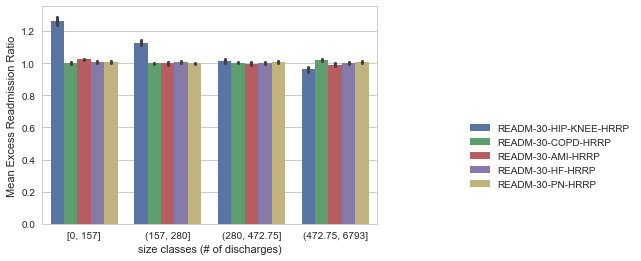

In [200]:
sns.set_style("whitegrid")
ax = sns.barplot(x='size', y='Excess Readmission Ratio', hue='Measure Name', data=clean_hospital_read_df)
ax.set(xlabel='size classes (# of discharges)', ylabel='Mean Excess Readmission Ratio')
ax.legend(bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()
